## 颜色直方图

[[224 224 224 ... 202 202 202]
 [224 224 224 ... 201 201 201]
 [223 223 223 ... 202 202 202]
 ...
 [146 146 146 ... 120 120 120]
 [147 147 147 ... 130 130 130]
 [147 147 147 ... 137 137 137]]


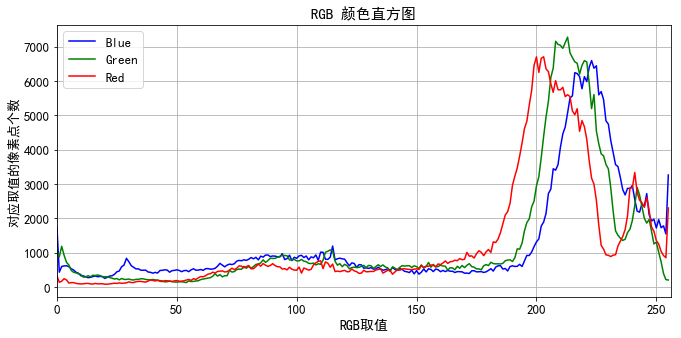

In [56]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
im = "bert.jpg"
image = cv2.imread(im)
image = cv2.cvtColor(image, cv2.IMREAD_COLOR)
hist_b = cv2.calcHist([image], [0], None, [256], [0,256])
hist_g = cv2.calcHist([image], [1], None, [256], [0,256])
hist_r = cv2.calcHist([image], [2], None, [256], [0,256])

# img_b = image[..., 0]
# img_g = image[..., 1]
# img_r = image[..., 2]
# print(img_b)

fig = plt.figure(figsize=(11,5))
plt.plot(hist_b, label='Blue', color='blue')
plt.plot(hist_g, label='Green', color='green')
plt.plot(hist_r, label='Red', color='red')

plt.title('RGB 颜色直方图', fontsize = 15)
plt.xlabel('RGB取值',fontsize = 14)
plt.ylabel('对应取值的像素点个数', fontsize = 13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.tick_params(axis = 'x', which = 'major', labelsize = 13)
plt.xlim([0, 256])
plt.legend(loc=2,prop = {'size' : 13})
plt.grid()
plt.show()


## RGB 每个通道等分

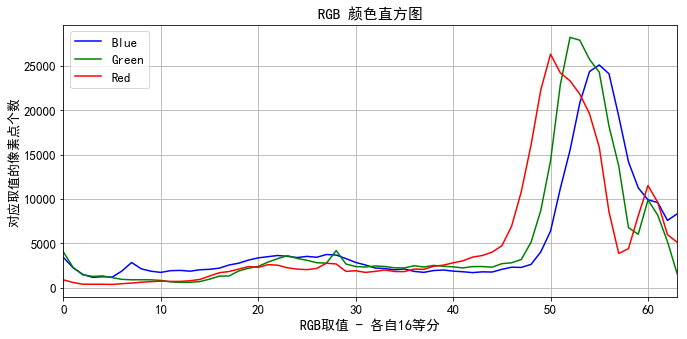

In [66]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
im = "bert.jpg"
image = cv2.imread(im)
image = cv2.cvtColor(image, cv2.IMREAD_COLOR)
hist_b = cv2.calcHist([image], [0], None, [64], [0,256])  # 等分64
hist_g = cv2.calcHist([image], [1], None, [64], [0,256])  # 等分64
hist_r = cv2.calcHist([image], [2], None, [64], [0,256])  # 等分64

fig = plt.figure(figsize=(11,5))
plt.plot(hist_b, label='Blue', color='blue')
plt.plot(hist_g, label='Green', color='green')
plt.plot(hist_r, label='Red', color='red')

plt.title('RGB 颜色直方图', fontsize = 15)
plt.xlabel('RGB取值 - 各自64等分',fontsize = 14)
plt.ylabel('对应取值的像素点个数', fontsize = 13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.tick_params(axis = 'x', which = 'major', labelsize = 13)
plt.xlim([0, 63])
plt.legend(loc=2,prop = {'size' : 13})
plt.grid()
plt.show()

In [80]:
print(image.shape)  # 长宽，三通道
print(image[1].shape) # 第一行像素，GBR 三个值
print(image[535].shape) # 最后一行像素，GBR 三个值
print(image[0][0]) # 左上角第一个像素GBR值

(536, 613, 3)
(613, 3)
(613, 3)
[224 218 211]


## 将三个通道，各自等分16份后，归一化为单一直方图

In [26]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
def get_bgr_features(image_file):
    slic = 16  # 等分数量
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.IMREAD_COLOR)
    height, width, channels = image.shape[:3]
    total = 0
    a = [0 for _ in range(slic * slic * slic)]  # 16 * 16 * 16 = 4096 种 组合
    normalize_a = [0 for _ in range(slic * slic * slic)]
    for i in range(height):  # 遍历所有像素点
        for j in range(width):
            tmp_bgr = image[i][j]  # 该位置像素的BGR值
            index_b = tmp_bgr[0] // slic # 获取B落在的等分区间index
            index_g = tmp_bgr[1] // slic # 获取G落在的等分区间index
            index_r = tmp_bgr[2] // slic # 获取R落在的等分区间index
            tmp_index = index_r + index_g * slic + index_b * slic * slic  # 像素的下标
            a[tmp_index] +=  1  # 对应的像素个数
            total += 1  # 总的像素数量

    for i in range(len(a)): # 归一化
         normalize_a[i]  = float(a[1] / total)
            
    return a



In [27]:
bert1 = get_bgr_features("bert.jpg")
bert2 = get_bgr_features("bert_colorless.jpg")


## 单一直方图可视化

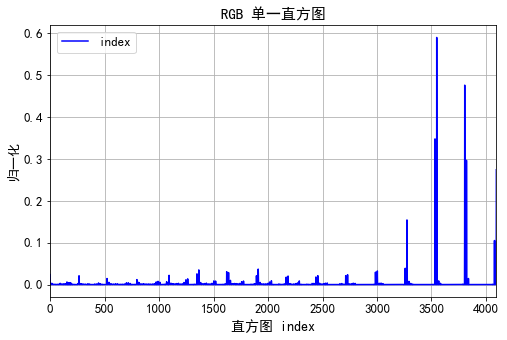

In [84]:
# print(len(bert1))

# import pandas as pd
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,5))
# plt.bar(range(len(bert1)), bert1,  label='Blue', color='blue')
# plt.plot(bert1,  label='index', color='blue')
plt.plot(hist_r,  label='index', color='blue')
plt.title('RGB 单一直方图', fontsize = 15)
plt.xlabel('直方图 index',fontsize = 14)
plt.ylabel('归一化', fontsize = 13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.tick_params(axis = 'x', which = 'major', labelsize = 13)
plt.xlim([0, 4096])
plt.legend(loc=2,prop = {'size' : 13})
plt.grid()
plt.show()




## 使用calHist函数 + normalize函数 也可实现转换为单一直方图

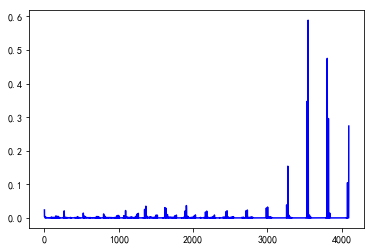

In [68]:
im = "bert.jpg"
image = cv2.imread(im)
# print(image)
image = cv2.cvtColor(image, cv2.IMREAD_COLOR)
hist_r = cv2.calcHist([image], [0,1,2], None, [16,16,16], [0,256,0,256,0,256])
hist_r = cv2.normalize(hist_r, hist_r).flatten()
plt.plot(hist_r, label='R', color='blue')

# plt.xlim([0, 256])
plt.show()

In [23]:
print(hist_r.shape) 
# 三个通道各自等分16份，共有16 * 16 * 16 = 4096 种 组合

(4096,)


In [25]:
print(bert1)

[0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.0009465316159820798, 0.00094653